# Supervised learning Model

## Preparing Data

In [3]:
import pandas as pd

imune_df = pd.read_csv("../raw_data/CIBERSORTx_Job7_Results.txt",sep='\t')

In [4]:
! pip install pyreadstat
import pyreadstat

clinical_df, meta = pyreadstat.read_sav("../raw_data/FIRE3_Heike_set_new.sav")
imune_df.head()

,Mixture,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998


In [43]:
imune_df.shape

(451, 26)

In [44]:
clinical_df.head()

,study,pat_nr,CET1_REST0,arm,sex,age,ecog,skin_rash,MOL_SG,RNA_Probe,...,orr1,dpr1,ets_cat,SYNCH_META,PRIMARY_RES,RADIOVORHER,LK,AP,CTX_ADJ,filter_$
0,FIRE 3,1.0,0.0,2.0,2.0,60.0,0.0,0.0,3.0,1.0,...,1.0,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,1.0
1,FIRE 3,2.0,1.0,1.0,2.0,52.0,1.0,0.0,NaN,0.0,...,0.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,FIRE 3,3.0,1.0,1.0,2.0,52.0,1.0,0.0,NaN,0.0,...,1.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,0.0
3,FIRE 3,4.0,0.0,2.0,1.0,58.0,0.0,0.0,3.0,1.0,...,1.0,NaN,0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0
4,FIRE 3,5.0,0.0,2.0,2.0,54.0,0.0,0.0,1.0,1.0,...,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [47]:
imune_df = imune_df.rename({'Mixture': 'pat_nr'}, axis='columns')
imune_df.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.136607,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.142035,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.066831,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.019745,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.065631,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998


In [48]:
clinical_df.shape

(735, 37)

In [49]:
clinical_df["pat_nr"]=clinical_df["pat_nr"].astype('int64')
clinical_df.pat_nr.dtype

dtype('int64')

In [59]:
clinical_df.head(30)
clinical2=clinical_df[["pat_nr","skin_rash"]]
clinical2

,pat_nr,skin_rash
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
730,896,0.0
731,897,0.0
732,898,0.0
733,899,0.0


In [60]:
cdf=imune_df.merge(clinical2, how='inner', on='pat_nr')
cdf.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE,skin_rash
0,1,0.040607,0.0,0.209086,0.122856,0.0,0.088533,0.000000,0.111784,0.052571,...,0.000000,0.008096,0.0,0.045574,0.0,0.119292,0.024,0.167135,1.012925,0.0
1,4,0.049146,0.0,0.121825,0.076978,0.0,0.153331,0.051057,0.068564,0.059623,...,0.003342,0.000000,0.0,0.171013,0.0,0.022019,0.030,0.161424,1.018143,0.0
2,5,0.003186,0.0,0.162668,0.042196,0.0,0.240454,0.000000,0.000000,0.018316,...,0.000000,0.000000,0.0,0.140387,0.0,0.111967,0.048,0.148986,1.029813,0.0
3,9,0.067346,0.0,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.071104,0.000000,0.0,0.188876,0.0,0.074924,0.004,0.250437,0.986058,1.0
4,10,0.000000,0.0,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.000000,0.009239,0.0,0.134230,0.0,0.070198,0.024,0.169331,1.020998,1.0


In [54]:
cdf.shape

(442, 62)

## Initiating Supervised Model

In [65]:
X=cdf.drop(columns=["pat_nr","P-value","Correlation","RMSE","skin_rash"])
y=cdf["skin_rash"]

<AxesSubplot:>

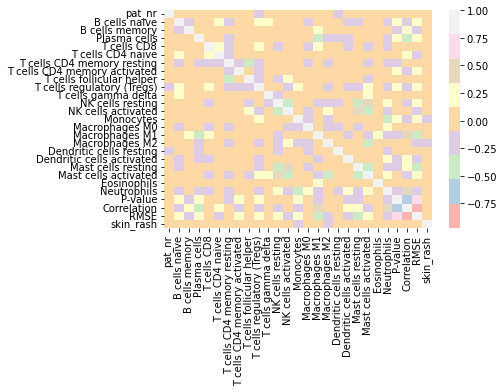

In [72]:
import seaborn as sns

# Heatmap
corr = cdf.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "Pastel1")

### LogisticRegression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

model = LogisticRegression(class_weight='balanced')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 6) # Holdout

In [127]:
cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.097078,0.015552,0.558824,0.444444,0.285714,0.347826
1,0.006050,0.005374,0.636364,0.500000,0.333333,0.400000
2,0.004411,0.005309,0.545455,0.625000,0.294118,0.400000
3,0.005832,0.005553,0.545455,0.250000,0.181818,0.210526
4,0.007932,0.004342,0.666667,0.625000,0.384615,0.476190
5,0.005971,0.004859,0.363636,0.375000,0.157895,0.222222
6,0.004211,0.005248,0.575758,0.750000,0.333333,0.461538
7,0.004756,0.005132,0.484848,0.375000,0.200000,0.260870
8,0.007693,0.004260,0.727273,0.875000,0.466667,0.608696
9,0.004019,0.003928,0.545455,0.555556,0.312500,0.400000


/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


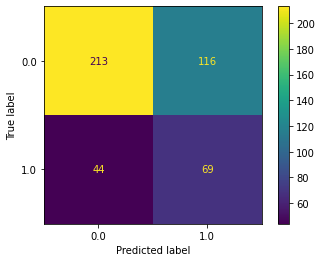

In [128]:
from sklearn.metrics import plot_confusion_matrix
model=model.fit(X,y)
plot_confusion_matrix(model,X,y)

In [124]:
y.value_counts()

0.0    329
1.0    113
Name: skin_rash, dtype: int64

### KNeighborsClassifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
cv_results = cross_validate(model2, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.009015,0.019799,0.735294,0.000000,0.000000,0.000000
1,0.002519,0.006612,0.757576,0.000000,0.000000,0.000000
2,0.002337,0.005244,0.727273,0.250000,0.400000,0.307692
3,0.001659,0.005326,0.727273,0.125000,0.333333,0.181818
4,0.002027,0.005507,0.666667,0.250000,0.285714,0.266667
5,0.001972,0.005747,0.727273,0.125000,0.333333,0.181818
6,0.002160,0.008054,0.727273,0.250000,0.400000,0.307692
7,0.002973,0.013492,0.757576,0.125000,0.500000,0.200000
8,0.002346,0.006547,0.696970,0.250000,0.333333,0.285714
9,0.002637,0.007180,0.696970,0.111111,0.333333,0.166667


/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


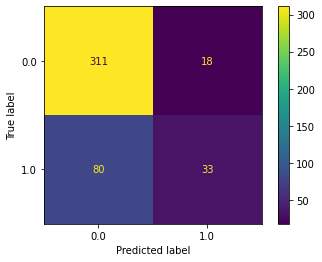

In [101]:
plot_confusion_matrix(model2,X,y)

### SGDClassifier

In [129]:
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

model3 = SGDClassifier(class_weight='balanced')


model3.fit(X_test,y_test)
cv_results = cross_validate(model3, X_test, y_test, cv=10, scoring=['precision'])

#simplified_model_score = cv_results['test_score'].mean()
cv_results

{'fit_time': array([0.04345512, 0.00677776, 0.00340819, 0.00362086, 0.00221705,
        0.00228477, 0.00246716, 0.00217795, 0.00200295, 0.00190592]),
 'score_time': array([0.04808688, 0.00527096, 0.00298882, 0.00278401, 0.00212598,
        0.0037291 , 0.00232196, 0.00216675, 0.00195694, 0.001899  ]),
 'test_precision': array([0.4       , 1.        , 0.27272727, 1.        , 0.        ,
        0.        , 0.        , 0.27272727, 0.27272727, 0.16666667])}

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


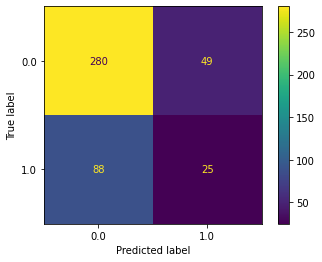

In [130]:
plot_confusion_matrix(model3,X,y)

### Best Model so far

In [105]:
best="KNeighbors"

In [108]:
model4 = KNeighborsClassifier(n_neighbors=20)
model4.fit(X_train,y_train)
cv_results = cross_validate(model4, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Use

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.003079,0.010003,0.735294,0.000,0.0,0.000000
1,0.002692,0.008219,0.727273,0.000,0.0,0.000000
2,0.002198,0.006559,0.727273,0.000,0.0,0.000000
3,0.002366,0.008156,0.757576,0.000,0.0,0.000000
4,0.002575,0.010931,0.787879,0.125,1.0,0.222222
5,0.001951,0.008440,0.757576,0.000,0.0,0.000000
6,0.002617,0.006869,0.757576,0.000,0.0,0.000000
7,0.002433,0.006265,0.757576,0.000,0.0,0.000000
8,0.001877,0.007471,0.757576,0.000,0.0,0.000000
9,0.001956,0.006884,0.727273,0.000,0.0,0.000000


In [119]:
from sklearn.model_selection import GridSearchCV
model5 = KNeighborsClassifier()
k_grid={"n_neighbors":[20,21,22,23,24],'p': [1, 2, 3,4,5]}
 
search = GridSearchCV(model5, k_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 
search.fit(X_train,y_train);
search.best_params_

{'n_neighbors': 22, 'p': 1}

In [121]:
model6=KNeighborsClassifier(n_neighbors=22,p=1)
cv_results=cross_validate(model6,X_train,y_train,cv=5)
cv_results

{'fit_time': array([0.00362015, 0.00269198, 0.00205326, 0.00215483, 0.00210404]),
 'score_time': array([0.00657487, 0.00478506, 0.00459599, 0.00471234, 0.00439   ]),
 'test_score': array([0.74626866, 0.77272727, 0.75757576, 0.75757576, 0.74242424])}

/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


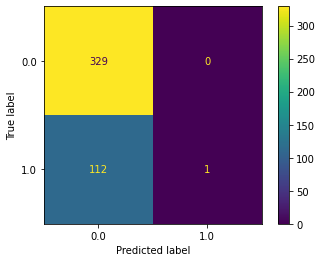

In [123]:
model6.fit(X_train,y_train)
plot_confusion_matrix(model6,X,y)

## What I am gonna work on: Logistic Regression Model

convergence after 30 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


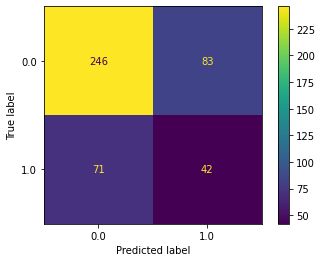

In [154]:
logreg = LogisticRegression(class_weight='balanced', solver="saga", verbose=1, penalty="elasticnet",l1_ratio=0.6)
logreg=logreg.fit(X_test,y_test)
plot_confusion_matrix(logreg,X,y)

In [156]:
cv_results = cross_validate(logreg, X_train, y_train, cv=5, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

convergence after 20 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 17 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.056246,0.010986,0.611940,0.411765,0.304348,0.350000
1,0.005009,0.004274,0.545455,0.312500,0.208333,0.250000
2,0.005878,0.005134,0.530303,0.562500,0.272727,0.367347
3,0.004027,0.004629,0.560606,0.625000,0.303030,0.408163
4,0.004033,0.004470,0.621212,0.705882,0.375000,0.489796


In [176]:
logreg.coef_

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01482729, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

# start again

In [178]:
new_df= pd.read_csv("../raw_data/cetux.csv")
new_df.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,sex,age,skin_rash
0,9,0.067346,0.000000,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.071104,0.000000,0.0,0.188876,0.000000,0.074924,0.004,1.0,61.0,1.0
1,10,0.000000,0.000000,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.000000,0.009239,0.0,0.134230,0.000000,0.070198,0.024,1.0,74.0,1.0
2,12,0.065798,0.000000,0.118399,0.111458,0.0,0.281396,0.000000,0.000000,0.069544,...,0.024802,0.000000,0.0,0.086495,0.032828,0.051155,0.002,1.0,73.0,1.0
3,15,0.010223,0.000000,0.186072,0.193724,0.0,0.283032,0.000000,0.000000,0.144012,...,0.000000,0.000000,0.0,0.081489,0.000000,0.004522,0.034,1.0,68.0,1.0
4,16,0.000000,0.013582,0.056297,0.080645,0.0,0.336947,0.000000,0.035983,0.057663,...,0.079572,0.010232,0.0,0.045427,0.000000,0.095906,0.022,1.0,42.0,1.0


In [179]:
X=new_df.drop(columns=["pat_nr","P-value","sex","age","skin_rash"])
y=new_df["skin_rash"]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 6) # Holdout

In [181]:
model = LogisticRegression(class_weight='balanced')

cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.054035,0.014708,0.588235,0.625000,0.555556,0.588235
1,0.004518,0.005760,0.588235,0.500000,0.571429,0.533333
2,0.005428,0.004384,0.294118,0.500000,0.333333,0.400000
3,0.003512,0.005074,0.562500,0.500000,0.571429,0.533333
4,0.006155,0.003829,0.562500,0.500000,0.571429,0.533333
5,0.004621,0.003688,0.437500,0.375000,0.428571,0.400000
6,0.003575,0.003530,0.437500,0.625000,0.454545,0.526316
7,0.003095,0.003467,0.312500,0.428571,0.300000,0.352941
8,0.003078,0.003616,0.625000,0.428571,0.600000,0.500000
9,0.003498,0.003653,0.562500,0.571429,0.500000,0.533333


/Users/leacebulla/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


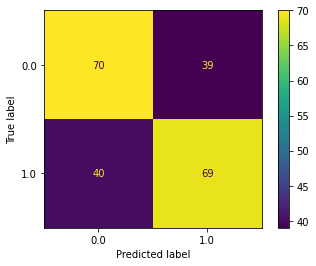

In [182]:
model=model.fit(X,y)
plot_confusion_matrix(model,X,y)

In [238]:
coef=model.coef_[0]
dicc=dict()
for i in range(len(list(X))):
    dicc[list(X)[i]]=coef[i]
dicc

dic=dict(sorted(dicc.items(), key=lambda item: item[1]))
dic

{'Macrophages M2': -1.0281205932253696,
 'Mast cells resting': -0.27996281030719167,
 'Macrophages M1': -0.25265729897547745,
 'T cells CD4 memory activated': -0.24604071981271972,
 'T cells CD8': -0.11293915693691195,
 'T cells CD4 memory resting': -0.0986085243857368,
 'NK cells activated': -0.09794740247420039,
 'Monocytes': -0.08440210927735183,
 'T cells regulatory (Tregs)': -0.048966732359054035,
 'Eosinophils': -0.000963835020026385,
 'T cells CD4 naive': -0.0005777683753863841,
 'T cells gamma delta': 0.0025638234104555803,
 'NK cells resting': 0.014608800164683135,
 'B cells naive': 0.02657539116906823,
 'Dendritic cells activated': 0.056652351355285596,
 'Mast cells activated': 0.08845727998754241,
 'B cells memory': 0.10038235693175533,
 'Dendritic cells resting': 0.14204039503716995,
 'T cells follicular helper': 0.2768019895396375,
 'Macrophages M0': 0.4959045041303684,
 'Neutrophils': 0.5066387373395576,
 'Plasma cells': 0.5410445447030392}

In [236]:
data=pd.DataFrame.from_dict(dicc,orient='columns')
data

ValueError: If using all scalar values, you must pass an index

In [232]:
dicc

{'B cells naive': 0.02657539116906823,
 'B cells memory': 0.10038235693175533,
 'Plasma cells': 0.5410445447030392,
 'T cells CD8': -0.11293915693691195,
 'T cells CD4 naive': -0.0005777683753863841,
 'T cells CD4 memory resting': -0.0986085243857368,
 'T cells CD4 memory activated': -0.24604071981271972,
 'T cells follicular helper': 0.2768019895396375,
 'T cells regulatory (Tregs)': -0.048966732359054035,
 'T cells gamma delta': 0.0025638234104555803,
 'NK cells resting': 0.014608800164683135,
 'NK cells activated': -0.09794740247420039,
 'Monocytes': -0.08440210927735183,
 'Macrophages M0': 0.4959045041303684,
 'Macrophages M1': -0.25265729897547745,
 'Macrophages M2': -1.0281205932253696,
 'Dendritic cells resting': 0.14204039503716995,
 'Dendritic cells activated': 0.056652351355285596,
 'Mast cells resting': -0.27996281030719167,
 'Mast cells activated': 0.08845727998754241,
 'Eosinophils': -0.000963835020026385,
 'Neutrophils': 0.5066387373395576}

<AxesSubplot:>

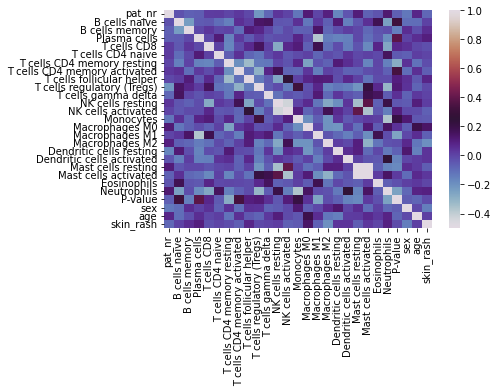

In [168]:
corr = new_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        cmap= "twilight")

In [177]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

model3 = smf.ols('skin_rash ~ B cells naive + B cells memory + Plasma cells + T cells CD8 + T cells CD4 naive ', data=new_df).fit()
print(model3.summary())

     |████████████████████████████████| 18.1 MB 37.5 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
  Created wheel for statsmodels: filename=statsmodels-0.13.1-cp38-cp38-macosx_10_14_x86_64.whl size=9685244 sha256=2196531c2d4c0b53b3e7c1233f499ed836b6f75710fe0efd129d92a5969b4ca1
  Stored in directory: /Users/leacebulla/Library/Caches/pip/wheels/29/23/2d/48ef1f91000c9be2d4f0c6e4d78b2f887cc00029e9353d0887
Successfully built statsmodels


SyntaxError: invalid syntax (<unknown>, line 1)

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

model3 = smf.ols('skin_rash ~ B cells naive + B cells memory + Plasma cells + T cells CD8 + T cells CD4 naive ', data=new_df).fit()
print(model3.summary())

NameError: name 'new_df' is not defined

In [7]:
clinical_df[['CET1_REST0','os_time_mo','ets_cat','orr1','predictedCMS',"pat_nr","skin_rash"]]

,CET1_REST0,os_time_mo,ets_cat,orr1,predictedCMS,pat_nr,skin_rash
0,0.0,50.398357,NaN,1.0,4.0,1.0,0.0
1,1.0,23.655031,NaN,0.0,NaN,2.0,0.0
2,1.0,19.121150,NaN,1.0,NaN,3.0,0.0
3,0.0,16.459959,0.0,1.0,2.0,4.0,0.0
4,0.0,14.817248,1.0,1.0,NaN,5.0,0.0
...,...,...,...,...,...,...,...
730,1.0,4.829569,NaN,0.0,3.0,896.0,0.0
731,0.0,14.587269,0.0,0.0,NaN,897.0,0.0
732,0.0,30.718686,NaN,0.0,NaN,898.0,0.0
733,0.0,31.737166,0.0,0.0,4.0,899.0,0.0
